In [1]:
from graph_representation_generator import GraphRepresentationGenerator
from dataset_manager import (
    MovieLensManager,
    INPUT_EMBEDS_REPLACE_KGE_DIMENSION,
    PROMPT_KGE_DIMENSION,
    ROOT,
)
from llm_manager import (
    PromptBertClassifier,
    VanillaBertClassifier,
    InputEmbedsReplaceClassifier,
)

In [3]:
kg_manager = MovieLensManager()
graph_representation_generator_prompt = GraphRepresentationGenerator(
    kg_manager.data,
    kg_manager.gnn_train_data,
    kg_manager.gnn_val_data,
    kg_manager.gnn_test_data,
    kge_dimension=PROMPT_KGE_DIMENSION,
)
graph_representation_generator_input_embeds_replace = GraphRepresentationGenerator(
    kg_manager.data,
    kg_manager.gnn_train_data,
    kg_manager.gnn_val_data,
    kg_manager.gnn_test_data,
    hidden_channels=INPUT_EMBEDS_REPLACE_KGE_DIMENSION,
    kge_dimension=INPUT_EMBEDS_REPLACE_KGE_DIMENSION,
)
prompt_embeddings = graph_representation_generator_prompt.get_saved_embeddings("prompt")
input_embeds_replace_embeddings = (
    graph_representation_generator_input_embeds_replace.get_saved_embeddings(
        "input_embeds_replace"
    )
)
save = False
if prompt_embeddings is None or input_embeds_replace_embeddings is None:
    prompt_embeddings = graph_representation_generator_prompt.generate_embeddings(
        kg_manager.llm_df
    )
    input_embeds_replace_embeddings = (
        graph_representation_generator_input_embeds_replace.generate_embeddings(
            kg_manager.llm_df
        )
    )
    save = True

kg_manager.append_prompt_graph_embeddings(prompt_embeddings, save=save)
kg_manager.append_input_embeds_replace_graph_embeddings(
    input_embeds_replace_embeddings, save=save
)
vanilla_bert_classifier = VanillaBertClassifier(
    kg_manager.llm_df,
    kg_manager.source_df,
    kg_manager.target_df,
    root_path=f"{ROOT}/llm/vanilla",
    false_ratio=-1.0,
)
dataset_vanilla = kg_manager.generate_vanilla_dataset(
    vanilla_bert_classifier.tokenize_function
)
prompt_bert_classifier = PromptBertClassifier(
    kg_manager,
    graph_representation_generator_prompt.get_embedding,
    model_max_length=512,
    root_path=f"{ROOT}/llm/prompt",
    false_ratio=-1.0,
)
dataset_prompt = kg_manager.generate_prompt_embedding_dataset(
    prompt_bert_classifier.tokenize_function,
)
input_embeds_replace_bert_classifier = InputEmbedsReplaceClassifier(
    kg_manager,
    graph_representation_generator_input_embeds_replace.get_embedding,
    root_path=f"{ROOT}/llm/input_embeds_replace",
    false_ratio=-1.0,
)
dataset_embedding = kg_manager.generate_input_embeds_replace_embedding_dataset(
    input_embeds_replace_bert_classifier.tokenizer.sep_token,
    input_embeds_replace_bert_classifier.tokenizer.pad_token,
    input_embeds_replace_bert_classifier.tokenize_function,
)
input_embeds_replace_frozen_bert_classifier = InputEmbedsReplaceClassifier(
    kg_manager,
    graph_representation_generator_input_embeds_replace.get_embedding,
    root_path=f"{ROOT}/llm/input_embeds_replace_frozen",
    false_ratio=-1.0,
)

loading pretrained model
Device: 'cuda'
loading pretrained model
Device: 'cuda'


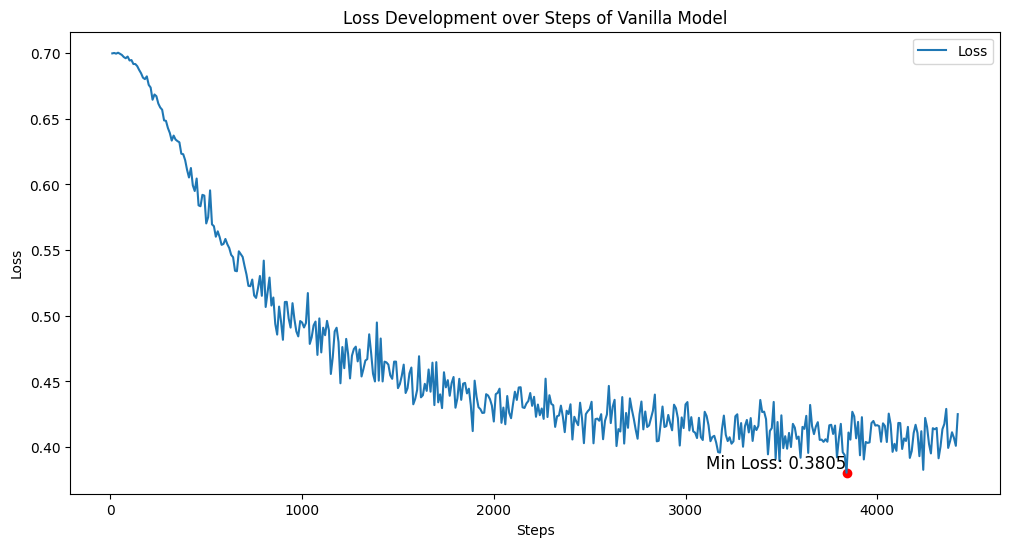

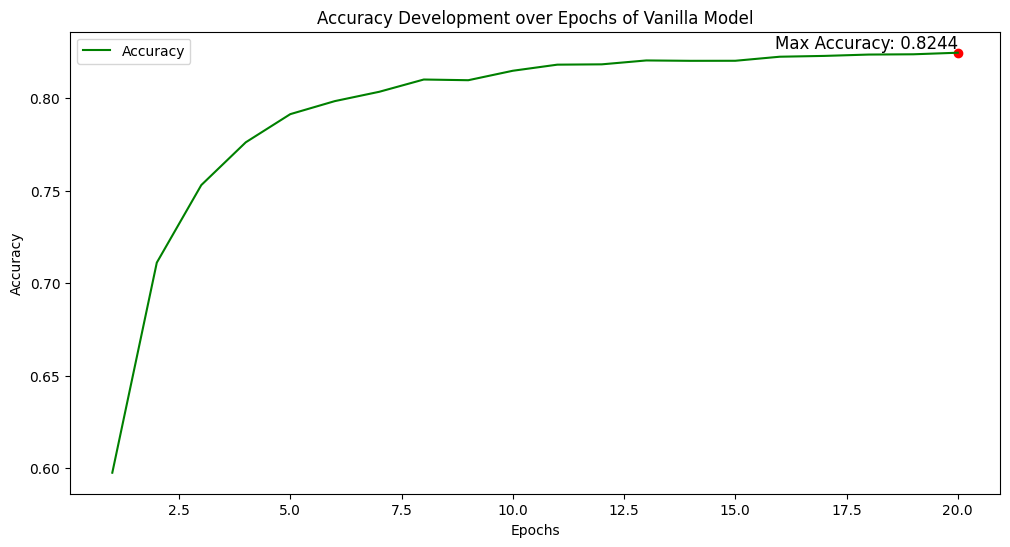

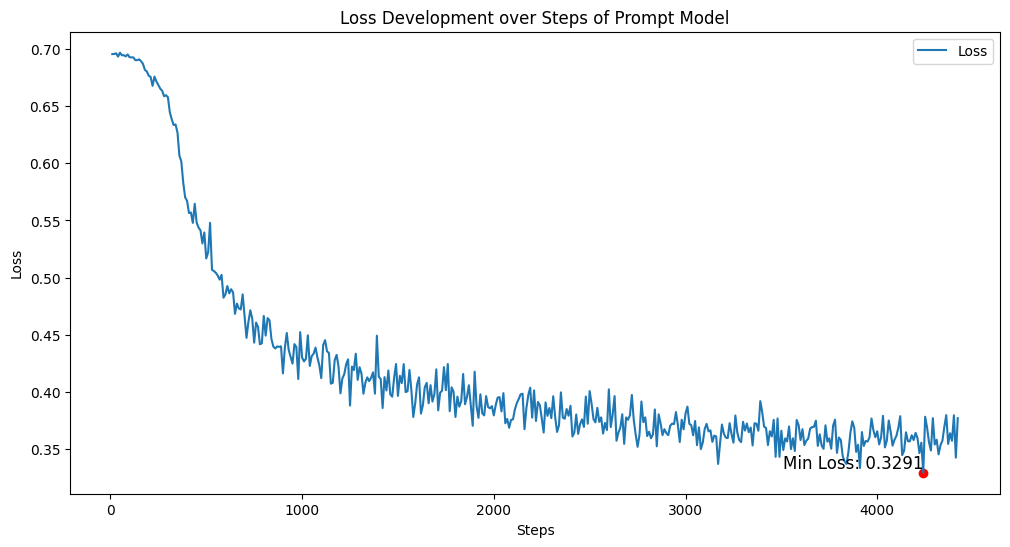

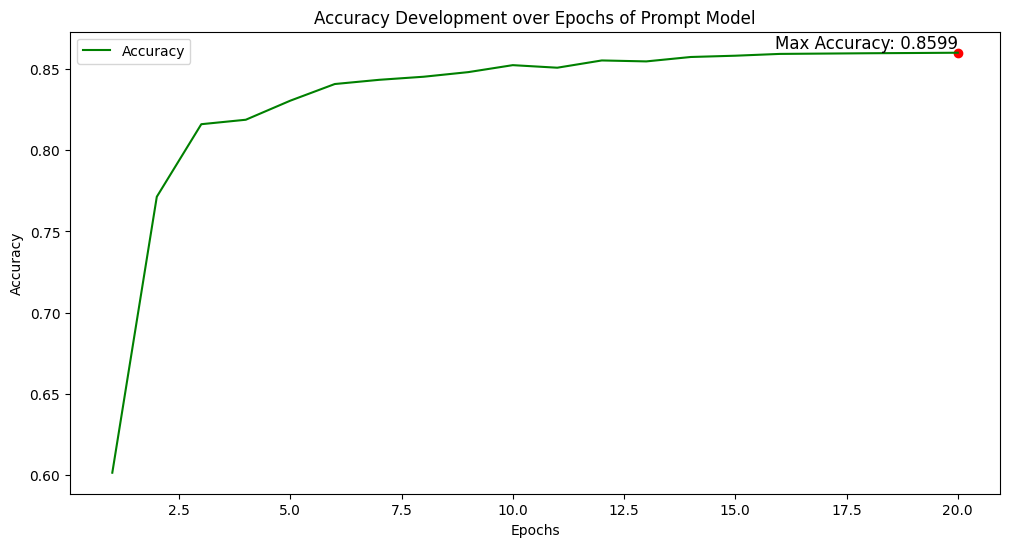

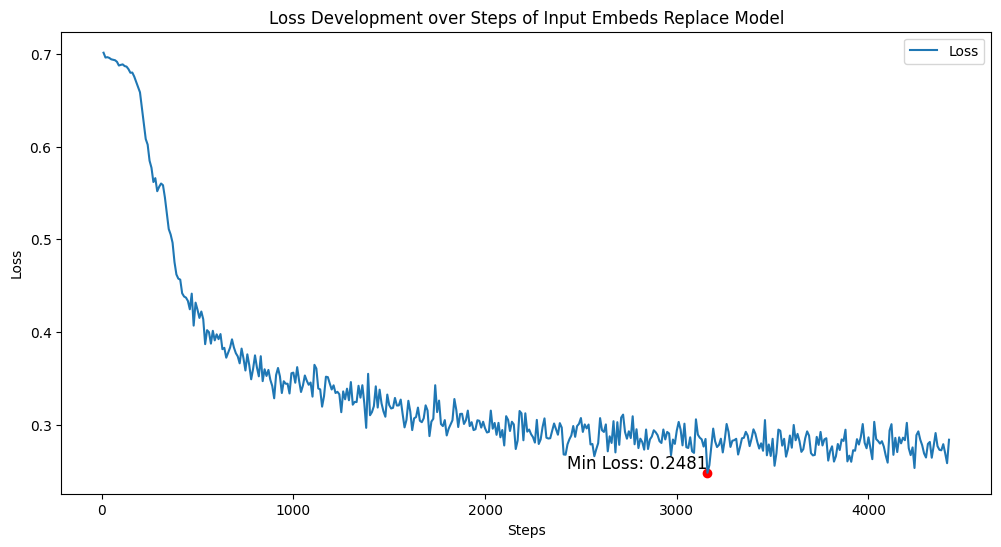

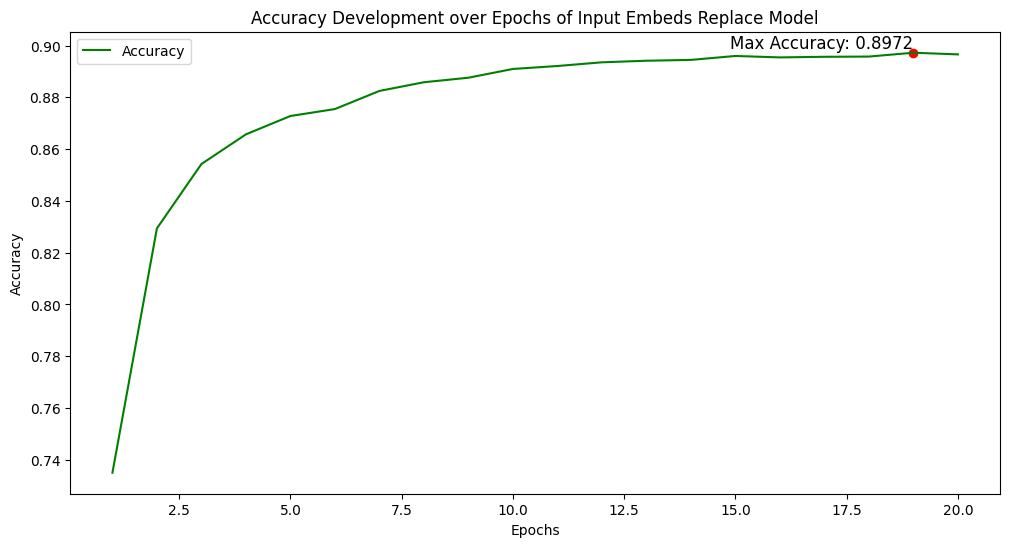

In [4]:
vanilla_bert_classifier._plot_training_loss_and_accuracy(
    model_type="Vanilla",
)
prompt_bert_classifier._plot_training_loss_and_accuracy(
    model_type="Prompt",
)
input_embeds_replace_bert_classifier._plot_training_loss_and_accuracy(
    model_type="Input Embeds Replace",
)
input_embeds_replace_frozen_bert_classifier._plot_training_loss_and_accuracy(
    model_type="Input Embeds Replace Frozen",
)

c:\Users\MARS\.conda\envs\hauptprojekt\Lib\site-packages\transformers\models\bert\modeling_bert.py:439: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


  0%|          | 0/67 [00:00<?, ?it/s]

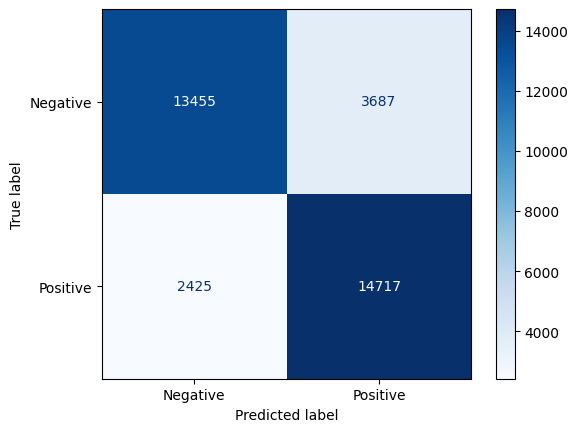

  0%|          | 0/67 [00:00<?, ?it/s]

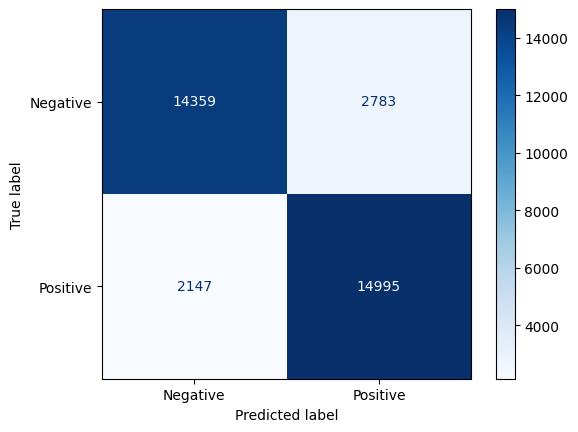

  0%|          | 0/67 [00:00<?, ?it/s]

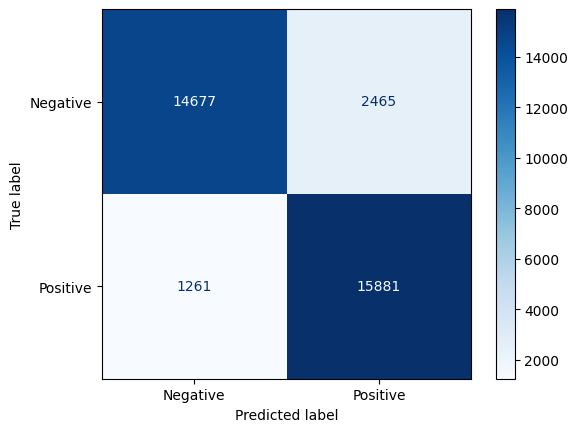

In [5]:
vanilla_bert_classifier.plot_confusion_matrix(
    split="val", dataset=dataset_vanilla, batch_size=512
)
prompt_bert_classifier.plot_confusion_matrix(
    split="val", dataset=dataset_prompt, batch_size=512
)
input_embeds_replace_bert_classifier.plot_confusion_matrix(
    split="val", dataset=dataset_embedding, batch_size=512
)